**Recommend  similar products using the  extracted features from the image.**

Data is scrap from the Flipcart website using Parsehub.

List of data scrap:



*   topwear_casual

*   topwear_formal

*   top_wear_tshirt

*   bottomwear_casual
*   bottonwear_formal


*   bottomwear_jeans


*   women_shirt


*   women_top

*   women_tshirt








In [1]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import os  
from sklearn.metrics import pairwise_distances
warnings.filterwarnings("ignore")

In [2]:
os.chdir("/content/drive/MyDrive/nlp_projects/product_recomendation")

topwear_tshirt

In [3]:
data_tshirt = pd.read_json('data/topwear_tshirt.json')

In [4]:
data_tshirt.shape

(1400, 4)

In [6]:
data_tshirt.head()

name  ... price
0  JACK & JONES  ...  ₹379
1   Allen Solly  ...  ₹584
2   Seven Rocks  ...  ₹399
3   Seven Rocks  ...  ₹298
4     Eyebogler  ...  ₹399

[5 rows x 4 columns]

In [7]:
data_tshirt["product_type"]="topwear_tshirt"
data_tshirt.head()

name  ...    product_type
0  JACK & JONES  ...  topwear_tshirt
1   Allen Solly  ...  topwear_tshirt
2   Seven Rocks  ...  topwear_tshirt
3   Seven Rocks  ...  topwear_tshirt
4     Eyebogler  ...  topwear_tshirt

[5 rows x 5 columns]

topwear_formal_shirt

In [42]:
data_topwear_formal = pd.read_json('data/topwear_formal.json')
data_topwear_formal.head()

name  ...   price
0           Raymond  ...  ₹1,399
1       Allen Solly  ...  ₹1,299
2  FabTag - Deeksha  ...    ₹399
3        5TH ANFOLD  ...    ₹599
4        5TH ANFOLD  ...    ₹599

[5 rows x 4 columns]

In [43]:
data_topwear_formal.shape

(1040, 4)

In [44]:
data_topwear_formal["product_type"]="topwear_formal"
data_topwear_formal.head()

name  ...    product_type
0           Raymond  ...  topwear_formal
1       Allen Solly  ...  topwear_formal
2  FabTag - Deeksha  ...  topwear_formal
3        5TH ANFOLD  ...  topwear_formal
4        5TH ANFOLD  ...  topwear_formal

[5 rows x 5 columns]

In [45]:
data_topwear_formal[data_topwear_formal.duplicated()].shape

(286, 5)

topwear_casual_shirt


In [46]:
data_topwear_casual = pd.read_json('data/topwear_casual.json')
data_topwear_casual.head()

name  ...   price
0           Allen Solly  ...  ₹1,329
1  Louis Philippe Sport  ...  ₹1,049
2                 FUBAR  ...    ₹566
3                 Surhi  ...    ₹499
4                 Surhi  ...    ₹501

[5 rows x 4 columns]

In [47]:
data_topwear_casual.shape

(1480, 4)

In [48]:
data_topwear_casual["product_type"]="topwear_casual"
data_topwear_casual.head(3)

name  ...    product_type
0           Allen Solly  ...  topwear_casual
1  Louis Philippe Sport  ...  topwear_casual
2                 FUBAR  ...  topwear_casual

[3 rows x 5 columns]

bottomwear jeans

In [49]:
data_bottomwear_jeans = pd.read_json('data/bottomwear_jeans.json')
data_bottomwear_jeans.head()

name  ...   price
0  JACK & JONES  ...  ₹1,049
1        Spykar  ...  ₹1,430
2  UNITED DENIM  ...    ₹499
3  UNITED DENIM  ...    ₹499
4  UNITED DENIM  ...    ₹499

[5 rows x 4 columns]

In [50]:
data_bottomwear_jeans.shape

(1720, 4)

In [51]:
data_bottomwear_jeans["product_type"]="bottomwear_jeans"
data_bottomwear_jeans.head(3)

name                        title  ...   price      product_type
0  JACK & JONES     Slim Men Dark Blue Jeans  ...  ₹1,049  bottomwear_jeans
1        Spykar  Super Skinny Men Blue Jeans  ...  ₹1,430  bottomwear_jeans
2  UNITED DENIM         Slim Men Black Jeans  ...    ₹499  bottomwear_jeans

[3 rows x 5 columns]

bottomwear casual trouser

In [52]:
data_bottomwear_casual = pd.read_json('data/bottomwear_casual.json')
data_bottomwear_casual.head()

name  ...   price
0      AD & AV  ...  ₹1,045
1  Allen Solly  ...  ₹1,299
2      AD & AV  ...    ₹595
3      AD & AV  ...    ₹595
4   BEN MARTIN  ...    ₹558

[5 rows x 4 columns]

In [53]:
data_bottomwear_casual.shape

(1080, 4)

In [54]:
data_bottomwear_casual["product_type"]="bottomwear_casual"
data_bottomwear_casual.head(3)

name  ...       product_type
0      AD & AV  ...  bottomwear_casual
1  Allen Solly  ...  bottomwear_casual
2      AD & AV  ...  bottomwear_casual

[3 rows x 5 columns]

bottomwear formal trouser

In [55]:
data_bottomwear_formal = pd.read_json('data/bottomwear_formal.json')
data_bottomwear_formal.head()

name  ...                                          price_url
0  AD & AV  ...  https://www.flipkart.com/ad-av-regular-fit-men...
1   Fabled  ...  https://www.flipkart.com/fabled-slim-fit-men-b...
2  AD & AV  ...  https://www.flipkart.com/ad-av-regular-fit-men...
3  AD & AV  ...  https://www.flipkart.com/ad-av-regular-fit-men...
4  AD & AV  ...  https://www.flipkart.com/ad-av-regular-fit-men...

[5 rows x 5 columns]

In [56]:
data_bottomwear_formal.shape

(1159, 5)

In [57]:
data_bottomwear_formal["product_type"]="bottomwear_formal"
data_bottomwear_formal.head(3)

name  ...       product_type
0  AD & AV  ...  bottomwear_formal
1   Fabled  ...  bottomwear_formal
2  AD & AV  ...  bottomwear_formal

[3 rows x 6 columns]

In [58]:
data_bottomwear_formal.drop("price_url",1,inplace=True)
data_bottomwear_formal.head(2)

name  ...       product_type
0  AD & AV  ...  bottomwear_formal
1   Fabled  ...  bottomwear_formal

[2 rows x 5 columns]

women_top

In [59]:
women_top=pd.read_json('data/women_top.json')
women_top.head()

name  ... price
0  GIRLS SHOPPIE  ...  ₹299
1         Oomph!  ...  ₹269
2        Silkova  ...  ₹288
3         Oomph!  ...  ₹269
4      God Bless  ...  ₹399

[5 rows x 4 columns]

In [60]:
women_top.shape

(1040, 4)

In [67]:
women_top["product_type"]="women_casual"
women_top.head(3)

name  ...  product_type
0  GIRLS SHOPPIE  ...  women_casual
1         Oomph!  ...  women_casual
2        Silkova  ...  women_casual

[3 rows x 5 columns]

women shirt

In [62]:
women_shirt=pd.read_json('data/women_shirt.json')
women_shirt.head()

name  ... price
0       ALI JOLLY  ...  ₹503
1       ALI JOLLY  ...  ₹503
2  Funday Fashion  ...  ₹299
3  Funday Fashion  ...  ₹499
4          Selvia  ...  ₹383

[5 rows x 4 columns]

In [63]:
women_shirt.shape

(1040, 4)

In [64]:
women_shirt["product_type"]="womenshirt"
women_shirt.head(3)

name  ... product_type
0       ALI JOLLY  ...   womenshirt
1       ALI JOLLY  ...   womenshirt
2  Funday Fashion  ...   womenshirt

[3 rows x 5 columns]

women_tshirt

In [65]:
women_tshirt=pd.read_json('data/women_tshirt.json')
women_tshirt.head()

name  ...                                          price_url
0    Clovia  ...  https://www.flipkart.com/clovia-printed-women-...
1    Clovia  ...  https://www.flipkart.com/clovia-printed-women-...
2  FLEXIMAA  ...  https://www.flipkart.com/fleximaa-printed-wome...
3  FLEXIMAA  ...  https://www.flipkart.com/fleximaa-printed-wome...
4  FLEXIMAA  ...  https://www.flipkart.com/fleximaa-graphic-prin...

[5 rows x 5 columns]

In [66]:
women_tshirt.drop("price_url",1,inplace=True)
women_tshirt.shape

(1040, 4)

In [68]:
women_tshirt["product_type"]="womentshirt"
women_tshirt.head(3)

name                                       title  ... price product_type
0    Clovia       Printed Women Round Neck Pink T-Shirt  ...  ₹287  womentshirt
1    Clovia      Printed Women Round Neck Green T-Shirt  ...  ₹287  womentshirt
2  FLEXIMAA  Printed Women Round Neck Red, Blue T-Shirt  ...  ₹399  womentshirt

[3 rows x 5 columns]

Combine all the data

In [69]:
data=pd.concat([data_tshirt,data_topwear_formal,data_topwear_casual,data_bottomwear_jeans,data_bottomwear_casual,data_bottomwear_formal,women_top,women_shirt,women_tshirt])
data.shape

(10999, 5)

In [70]:
data.head()

name  ...    product_type
0  JACK & JONES  ...  topwear_tshirt
1   Allen Solly  ...  topwear_tshirt
2   Seven Rocks  ...  topwear_tshirt
3   Seven Rocks  ...  topwear_tshirt
4     Eyebogler  ...  topwear_tshirt

[5 rows x 5 columns]

combine data

In [71]:
data.to_csv("data_v1.csv",index=False)

In [89]:
data=pd.read_csv("data_v1.csv")
data.head()

name  ...    product_type
0  JACK & JONES  ...  topwear_tshirt
1   Allen Solly  ...  topwear_tshirt
2   Seven Rocks  ...  topwear_tshirt
3   Seven Rocks  ...  topwear_tshirt
4     Eyebogler  ...  topwear_tshirt

[5 rows x 5 columns]

Missing value

In [73]:
data.isnull().sum()

name             0
title            0
img_url          0
price           46
product_type     0
dtype: int64

In [74]:
data.shape

(10999, 5)

Univariate analysis

In [75]:
data.columns

Index(['name', 'title', 'img_url', 'price', 'product_type'], dtype='object')

name

In [77]:
data["name"].describe()

count           10999
unique            738
top       Allen Solly
freq              549
Name: name, dtype: object

In [78]:
data["name"].value_counts()

Allen Solly             549
PETER ENGLAND           432
AD & AV                 413
METRONAUT               369
HIGHLANDER              345
                       ... 
Stylo Deeksha             1
DECKEDUP                  1
Enchanted Drapes          1
Thisbe                    1
G .S. A. ENTERPRISES      1
Name: name, Length: 738, dtype: int64

title

In [79]:
data["title"].describe()

count                   10999
unique                   2065
top       Slim Men Blue Jeans
freq                      282
Name: title, dtype: object

In [80]:
data["title"].value_counts()

Slim Men Blue Jeans                                   282
Slim Men Black Jeans                                  255
Skinny Men Blue Jeans                                 175
Men Slim Fit Solid Formal Shirt                       159
Women Regular Fit Solid Casual Shirt                  126
                                                     ... 
Casual Short Sleeve Checkered Women White Top           1
Casual Regular Sleeve Solid Women Dark Blue Top         1
Anti-Bacterial Men Slim Fit Checkered Casual Shirt      1
Regular Fit Men Brown Wool Blend Trousers               1
Solid Men Round Neck Reversible Blue T-Shirt            1
Name: title, Length: 2065, dtype: int64

In [91]:
data.shape

(10999, 5)

In [92]:
duplicate = data[data.duplicated()]
duplicate.shape

(3881, 5)

In [93]:
data.drop_duplicates( inplace = True)
data.shape

(7118, 5)

In [94]:
data.tail()

name  ... product_type
10991  AJA BEAUTIFUL YOU  ...  womentshirt
10992         Adam White  ...  womentshirt
10993              CHOZI  ...  womentshirt
10995            Reifica  ...  womentshirt
10996           RS Print  ...  womentshirt

[5 rows x 5 columns]

In [95]:
data.reset_index(inplace = True,drop=True)
data.tail()

name  ... product_type
7113  AJA BEAUTIFUL YOU  ...  womentshirt
7114         Adam White  ...  womentshirt
7115              CHOZI  ...  womentshirt
7116            Reifica  ...  womentshirt
7117           RS Print  ...  womentshirt

[5 rows x 5 columns]

data_ after removing duplicates

In [96]:
data.to_csv("data_v2.csv",index=False)

In [97]:
df2=pd.read_csv("data_v2.csv")
df2.head()

name  ...    product_type
0  JACK & JONES  ...  topwear_tshirt
1   Allen Solly  ...  topwear_tshirt
2   Seven Rocks  ...  topwear_tshirt
3   Seven Rocks  ...  topwear_tshirt
4     Eyebogler  ...  topwear_tshirt

[5 rows x 5 columns]

suffle_data

In [99]:
data = df2.sample(frac = 1)
data.head()

name  ...       product_type
5125  SHEETAL ASSOCIATES  ...       women_casual
2799      FLYING MACHINE  ...   bottomwear_jeans
5618           SASSAFRAS  ...         womenshirt
1044               ARROW  ...     topwear_formal
4508       PETER ENGLAND  ...  bottomwear_formal

[5 rows x 5 columns]

In [100]:
data.reset_index(inplace = True,drop=True)
data.head()

name  ...       product_type
0  SHEETAL ASSOCIATES  ...       women_casual
1      FLYING MACHINE  ...   bottomwear_jeans
2           SASSAFRAS  ...         womenshirt
3               ARROW  ...     topwear_formal
4       PETER ENGLAND  ...  bottomwear_formal

[5 rows x 5 columns]

In [101]:
data.tail()

name  ...       product_type
7113      EVOMODA  ...         womenshirt
7114       Clovia  ...        womentshirt
7115        ARROW  ...  bottomwear_formal
7116  Seven Rocks  ...     topwear_tshirt
7117     Ap'pulse  ...        womentshirt

[5 rows x 5 columns]

Assign a unique index

In [102]:
data["unique_id"]=data.index
data.head()

name  ... unique_id
0  SHEETAL ASSOCIATES  ...         0
1      FLYING MACHINE  ...         1
2           SASSAFRAS  ...         2
3               ARROW  ...         3
4       PETER ENGLAND  ...         4

[5 rows x 6 columns]

In [103]:
data.to_csv("data_v3.csv",index=False)

In [104]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle

In [32]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.layers import merge, Input

In [106]:
data=pd.read_csv("data_v3.csv")
data.head()

name  ... unique_id
0  SHEETAL ASSOCIATES  ...         0
1      FLYING MACHINE  ...         1
2           SASSAFRAS  ...         2
3               ARROW  ...         3
4       PETER ENGLAND  ...         4

[5 rows x 6 columns]

store the image 

Data with index "625" and "1504" has no image url

In [110]:
data.drop(625,inplace=True)
data.shape

(7117, 6)

In [118]:
data.drop(1504,inplace=True)
data.shape

(7116, 6)

In [227]:
data.reset_index(drop=True,inplace=True)
data.shape

(7116, 6)

In [229]:
data["unique_id"]=data.index

In [230]:
data.tail()

name  ... unique_id
7111      EVOMODA  ...      7111
7112       Clovia  ...      7112
7113        ARROW  ...      7113
7114  Seven Rocks  ...      7114
7115     Ap'pulse  ...      7115

[5 rows x 6 columns]

In [268]:
data.product_type.value_counts()

women_casual         977
bottomwear_jeans     811
topwear_tshirt       795
womenshirt           769
topwear_casual       759
topwear_formal       754
womentshirt          752
bottomwear_formal    750
bottomwear_casual    749
Name: product_type, dtype: int64

In [231]:
data.to_csv("final_data.csv",index=False)

In [5]:
data=pd.read_csv("final_data.csv")

**select only the male items**

Use only male items to recommend

In [6]:
data2=data[data.product_type.isin(["bottomwear_casual","bottomwear_formal","topwear_formal","topwear_casual","topwear_tshirt","bottomwear_jeans"])]

In [7]:
data2.shape

(4618, 6)

In [67]:
data2.to_csv("final_male_data.csv",index=False)

In [278]:
# download the image from the url
from PIL import Image
import requests
from io import BytesIO

for index, row in data2.iterrows():
        #print(index)
        url = row['img_url']
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.save('images/img4k/img'+str(row['unique_id'])+'.jpeg')

In [281]:
#convert all the image to numpy array
image_input = Input(shape=(224,224,3))

model = VGG16(include_top=False,weights="imagenet",input_tensor=image_input)

model.summary()



from tqdm import tqdm
vgg16_feature_list=[]
for i in tqdm(data2.index):
  img_path ="images/img4k/img"+str(i)+".jpeg"
  img = image.load_img(img_path, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)

  vgg16_feature = model.predict(img_data)
  vgg16_feature_np = np.array(vgg16_feature)
  vgg16_feature_list.append(vgg16_feature_np.flatten())





  0%|          | 0/4618 [00:00<?, ?it/s]

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     



  0%|          | 1/4618 [00:00<35:58,  2.14it/s]

  0%|          | 3/4618 [00:00<26:29,  2.90it/s]

  0%|          | 5/4618 [00:00<19:47,  3.88it/s]

  0%|          | 7/4618 [00:00<15:20,  5.01it/s]

  0%|          | 9/4618 [00:00<12:18,  6.24it/s]

  0%|          | 11/4618 [00:01<09:49,  7.82it/s]

  0%|          | 13/4618 [00:01<08:05,  9.48it/s]

  0%|          | 15/4618 [00:01<07:03, 10.87it/s]

  0%|          | 17/4618 [00:01<06:17, 12.18it/s]

  0%|          | 19/4618 [00:01<05:49, 13.17it/s]

  0%|          | 21/4618 [00:01<05:21, 14.31it/s]

  0%|          | 23/4618 [00:01<05:06, 14.97it/s]

  1%|          | 25/4618 [00:01<05:02, 15.17it/s]

  1%|          | 27/4618 [00:01<04:47, 15.98it/s]

  1%|          | 29/4618 [00:02<04:36, 16.61it/s]

  1%|          | 31/4618 [00:02<04:32, 16.82it/s]

  1%|          | 33/4618 [00:02<04:36, 16.59it/s]

  1%|          | 35/4618 [00:02<04:33, 16.77it/s]

  1%|          | 37/4618 [00:02<04:29, 17.01it/s]

  1%|          | 39/4618 [00:02<04

In [282]:
vgg16_feature_list_np = np.array(vgg16_feature_list)

vgg16_feature_list_np.shape

(4618, 25088)

In [295]:
np.save(open('data_cnn_features_male.npy', 'wb'), vgg16_feature_list_np)

In [3]:
data_cnn_features = np.load('data_cnn_features_male.npy')

In [4]:
data_cnn_features.shape

(4618, 25088)

In [8]:
data2.head()

name  ... unique_id
1  FLYING MACHINE  ...         1
3           ARROW  ...         3
4   PETER ENGLAND  ...         4
7   PETER ENGLAND  ...         7
8      HIGHLANDER  ...         8

[5 rows x 6 columns]

In [9]:
data2.shape

(4618, 6)

Query image

convert into numpy array

In [89]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.layers import merge, Input
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from google.colab.patches import cv2_imshow
image_input = Input(shape=(224,224,3))
model = VGG16(include_top=False,weights="imagenet",input_tensor=image_input)


In [87]:
def img_to_array(img_path):
  img = image.load_img(img_path, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)

  vgg16_feature = model.predict(img_data)
  vgg16_feature_np = np.array(vgg16_feature)
  return vgg16_feature_np.flatten()



In [18]:
import urllib
import cv2
import urllib.request as ur
# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = ur.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image

In [91]:
def similar_product(no_of_product,df,query_feature):
  pairwise_dist = pairwise_distances(data_cnn_features, query_feature.reshape(1,-1))
  indices = np.argsort(pairwise_dist.flatten())[:no_of_product]
  selected_data=df[['img_url','title']].iloc[indices]
  img_url=selected_data["img_url"].values
  for url in img_url:

    image = url_to_image(url)
    cv2_imshow(image)


    cv2.waitKey(0)
   


Jeans

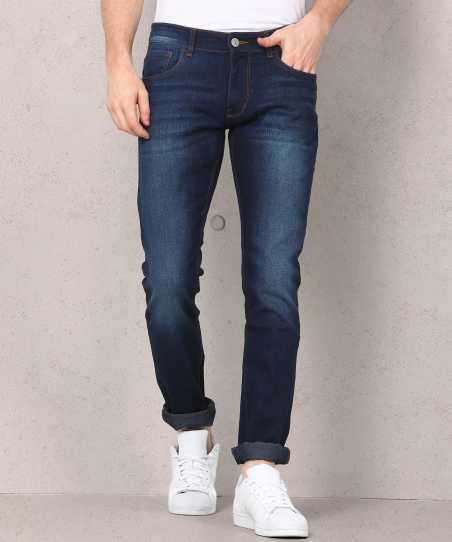

In [93]:
import IPython
path="/content/drive/MyDrive/nlp_projects/product_recomendation/query_image/jeans.jpeg"
IPython.display.Image(path, width = 250)

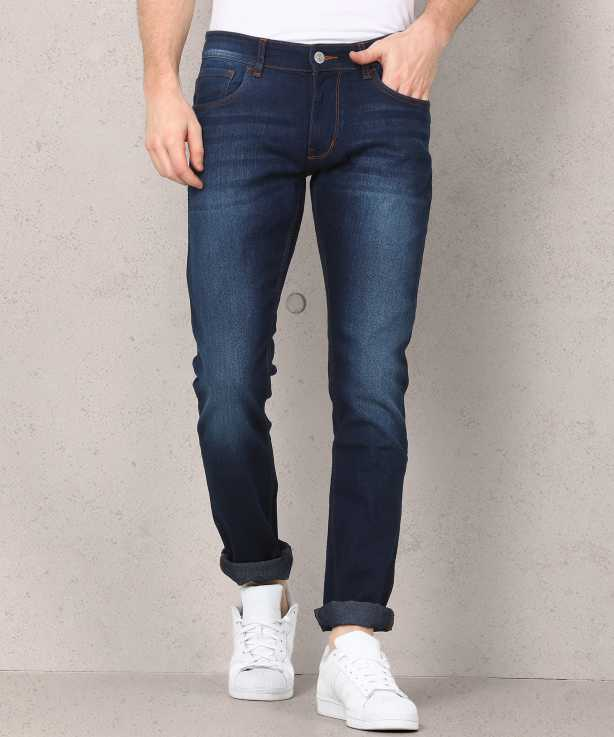

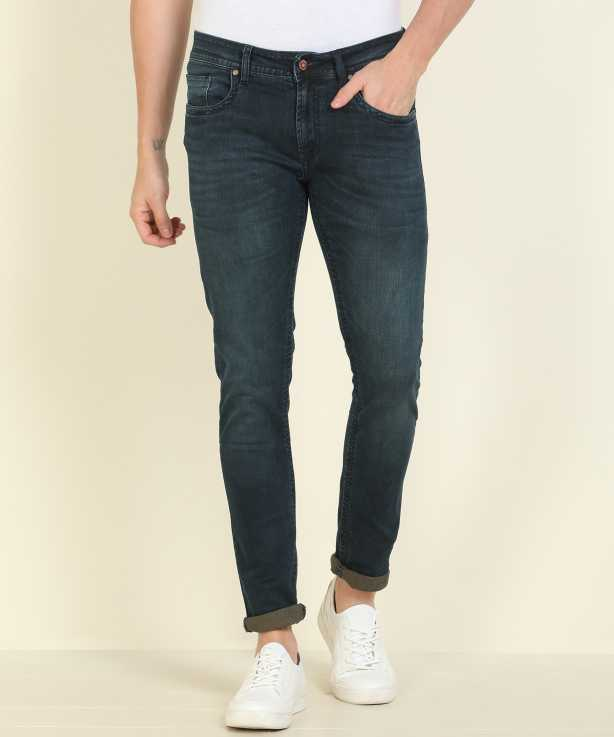

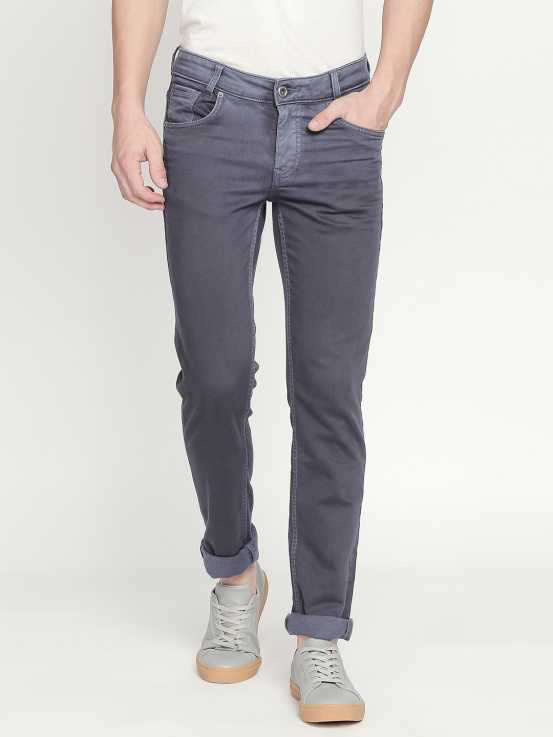

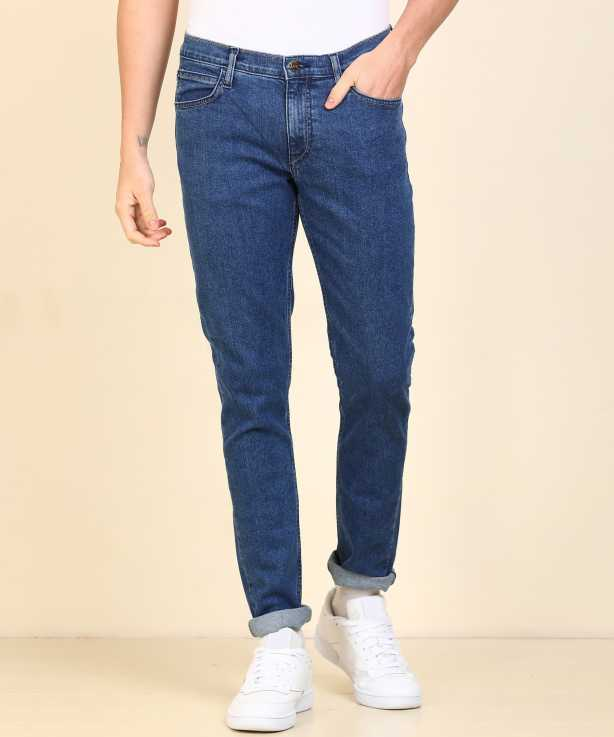

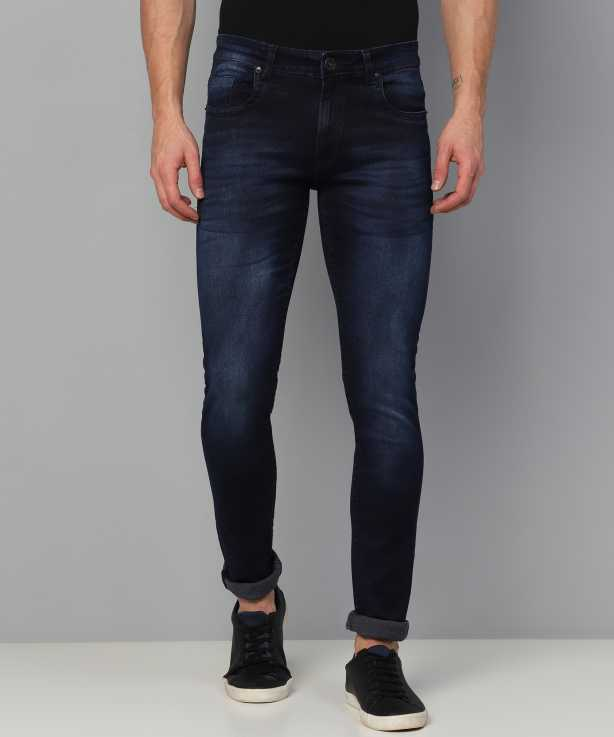

In [94]:
feature=img_to_array(path)
similar_product(5,data2,feature)

Casual Trouser

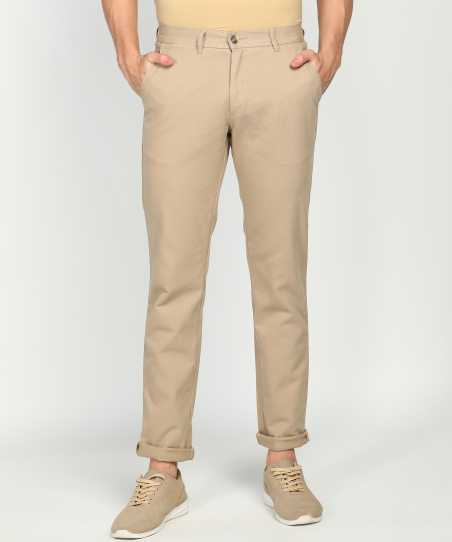

In [95]:
path="/content/drive/MyDrive/nlp_projects/product_recomendation/query_image/casual.jpeg"
IPython.display.Image(path, width = 250)

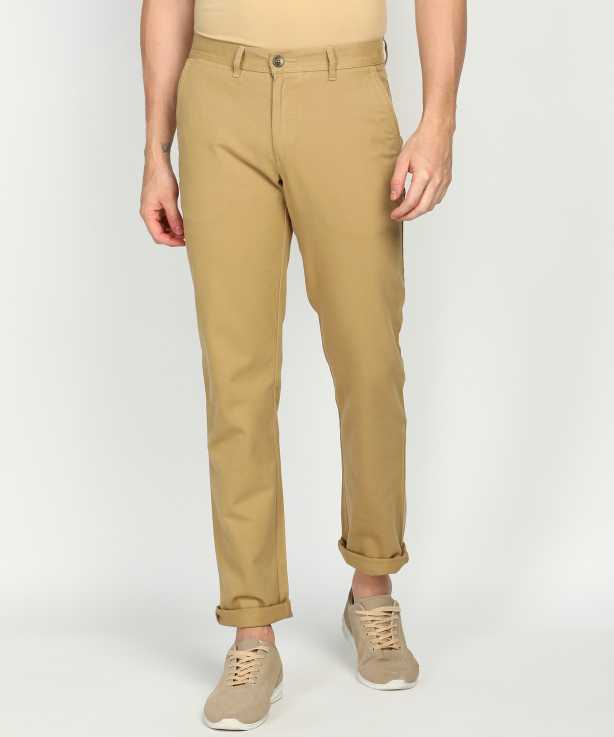

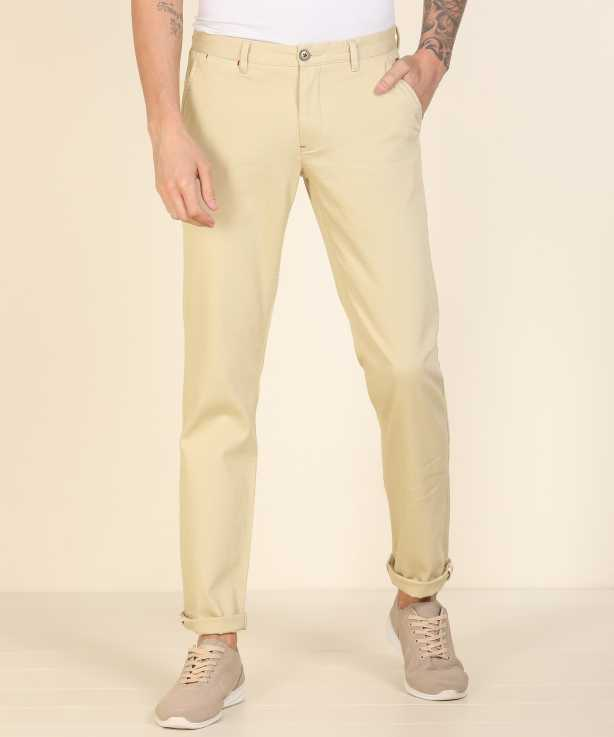

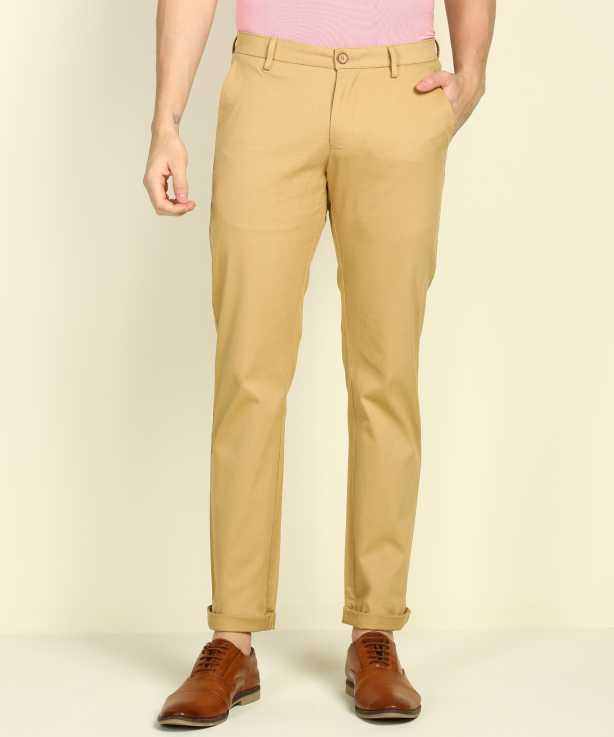

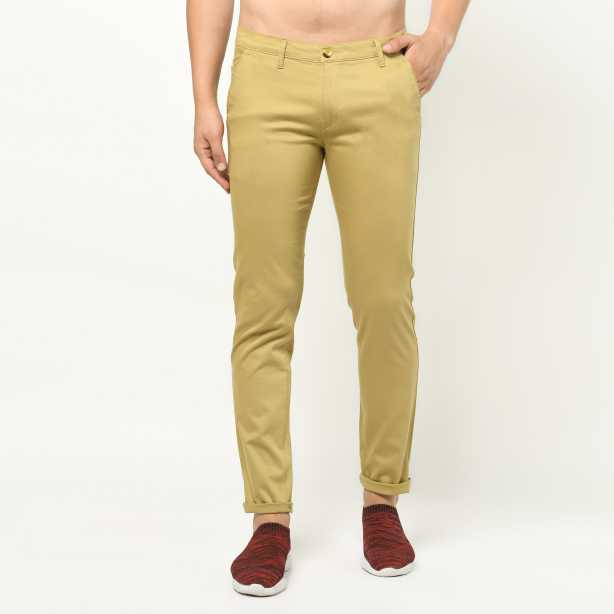

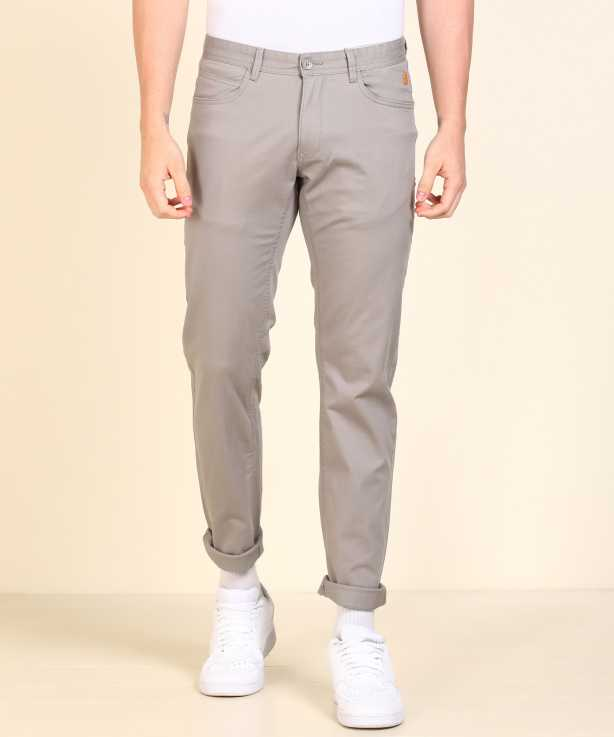

In [96]:
feature=img_to_array(path)
similar_product(5,data2,feature)

Casual shirt

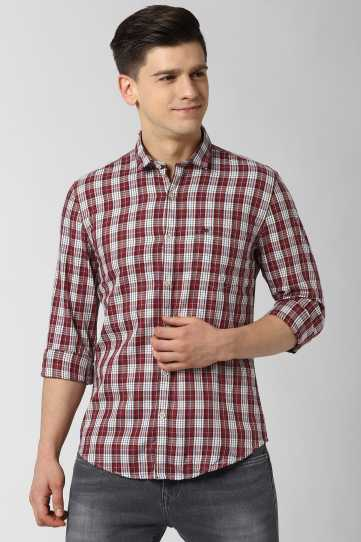

In [97]:
path="/content/drive/MyDrive/nlp_projects/product_recomendation/query_image/img1.jpeg"
IPython.display.Image(path, width = 250)

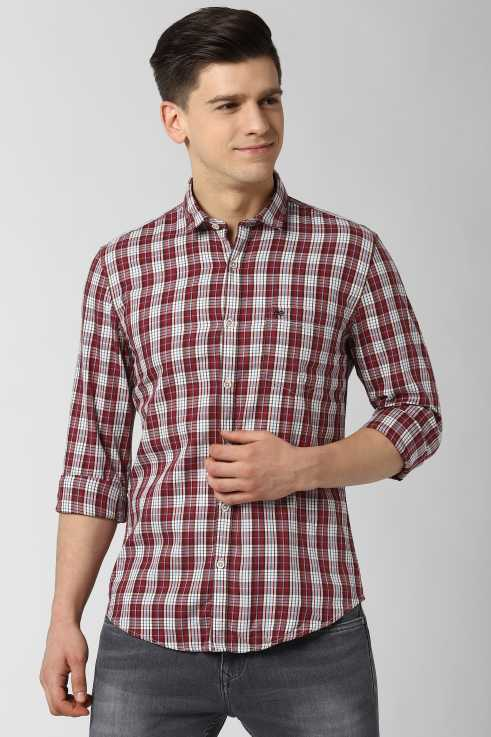

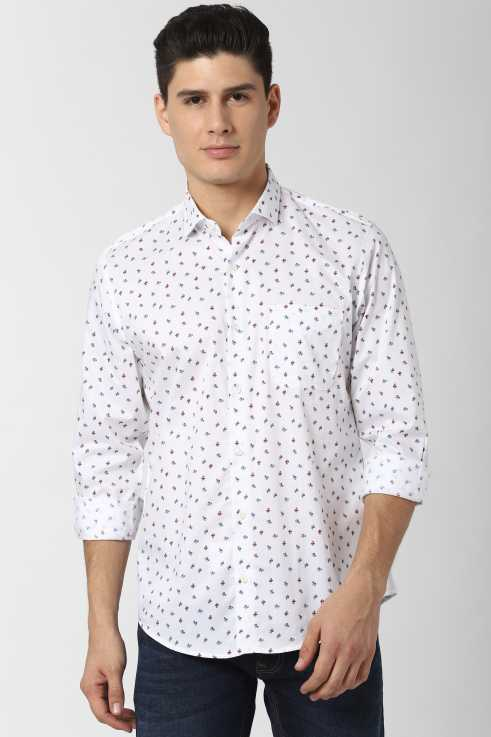

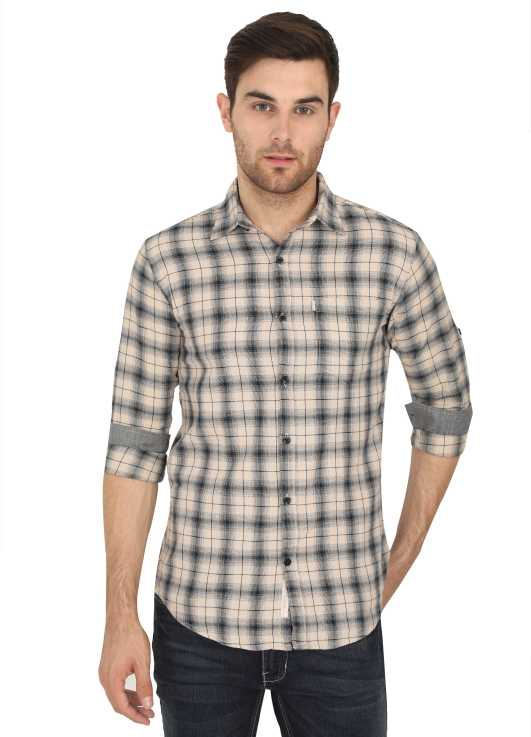

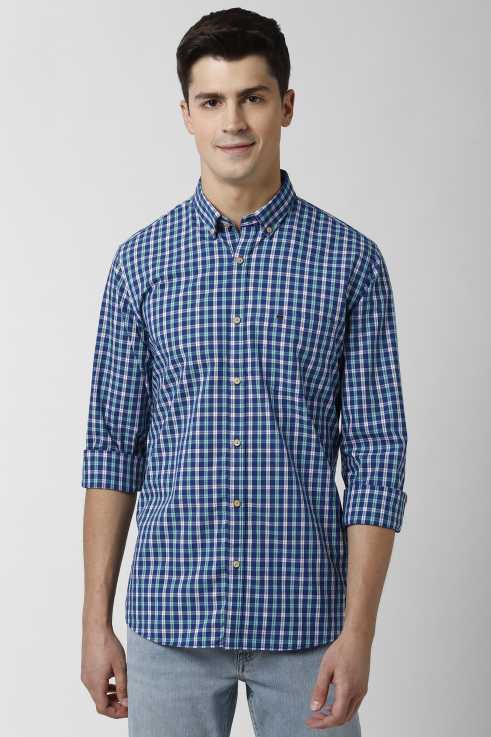

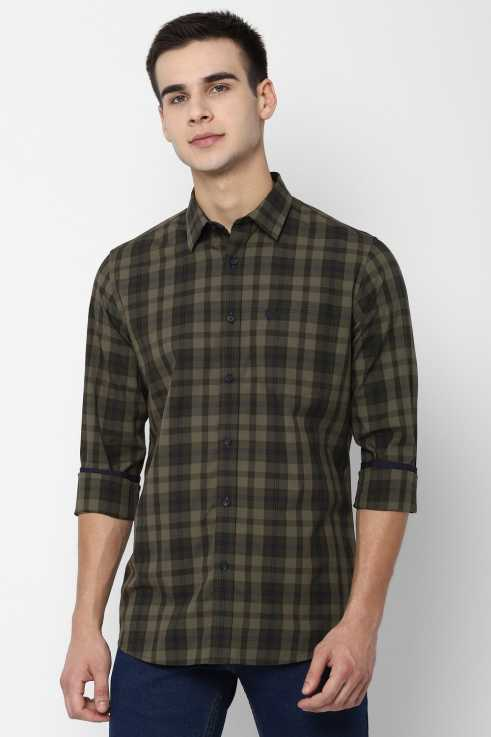

In [98]:
feature=img_to_array(path)
similar_product(5,data2,feature)